# Asset Pricing Problem set

# Section 3

In [2]:
import numpy as np
import pandas as pd
import pickle
from scipy import stats
from matplotlib import pyplot as plt

Load and merge data

In [3]:
files = ['AAPL_1', 'C_1', 'GBX_1', 'SPY_1', 'THO_1']
file_objs = []
for file in files:
    with open(file, 'rb') as pickle_file:
        file_objs.append(pickle.load(pickle_file))

Class OrderBook

In [6]:
class OrderBook:
    
    def __init__(self, data, perc):
        
        self.data = data[1]
        self.timestamp = data[0]
        df = pd.DataFrame.from_dict(self.data, orient='index')
    
        df.columns = ['volume', 'order_type', 'canc','canc1']
        df = df[['volume', 'order_type']]
        
        self.buy = df[df['order_type'] == 'B'].sort_index(ascending=False)
        self.sell = df[df['order_type'] == 'S'].sort_index()
        self.buy['QB'] = -self.buy['volume'].cumsum()
        self.sell['QS'] = self.sell['volume'].cumsum()
        
        orders = pd.concat([self.buy, self.sell])
        orders = orders.fillna(0)
        orders['Q'] = orders['QB'] + orders['QS']
        self.midpoint = orders[orders.Q < 0].index.values[0]
        self.perc=perc
        self.orders = orders[(orders.index >   self.midpoint-self.perc*self.midpoint) 
                             & (orders.index < self.midpoint+self.perc*self.midpoint)]
        self.Q = self.orders['Q']
        self.P = self.orders.index.values
                
    def estimation(self):
        A= stats.linregress(self.P, self.Q)
        self.gamma = A[1]
        self.beta = A[0]
        self.price = - self.gamma/self.beta
        self.ratio = self.beta 
        
    def plot(self):
        plt.figure(1)
        plt.plot(self.buy.index.values, self.buy['QB'], label='buy',color='green')
        plt.plot(self.sell.index.values, self.sell['QS'], label='sell',color='red')
        p_grid = np.linspace(self.midpoint-self.perc*self.midpoint, self.midpoint+self.perc*self.midpoint)
        plt.plot(p_grid, self.gamma + self.beta * p_grid, 'k', label='y = $\gamma + \beta$ P')

        plt.xlim(0.5 * self.midpoint, 1.5 * self.midpoint)
        plt.xlabel('Price')
        plt.ylabel('Volume')
        plt.title(' T = %i' %self.timestamp)
        plt.legend()
        plt.show()    

Example with AAPL

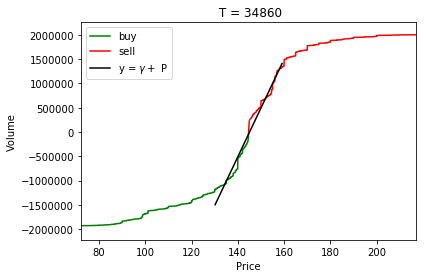

In [7]:
pb1 = OrderBook(file_objs[0][10],.1)
pb1.estimation()
pb1.plot()

Exercise 2 and 3

In [9]:
Ratio = np.zeros([5,390])
Price_diff = np.zeros([5,390])
for i in range(5):
    for j in range(390):
        pb1 = OrderBook(file_objs[i][j],.1)
        pb1.estimation()
        Ratio[i,j]=pb1.ratio
        Price_diff[i,j]=pb1.price-pb1.midpoint

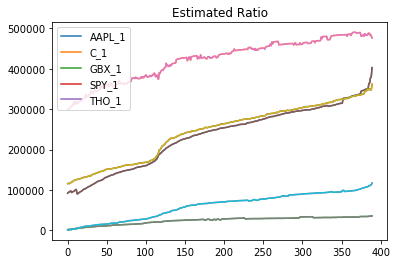

In [11]:
plt.figure(2)        
plt.plot(Ratio.T) 
plt.legend(files)   
plt.title("Estimated Ratio")
plt.show()

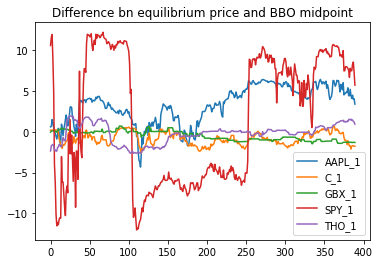

In [12]:
plt.figure(3)
plt.plot(Price_diff.T) 
plt.legend(files)   
plt.title("Difference bn equilibrium price and BBO midpoint")
plt.show()